In [1]:
import numpy as np
import pandas as pd
import sys, os, glob, corner
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.6, font='times')
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

In [3]:
from scipy.interpolate import interp1d
dprec = pd.read_csv("../../kepler_prot_teff/data/kepler_precision.txt", delim_whitespace=True)
_kepsigma = interp1d(dprec.kepmag, dprec.long, kind='cubic')

def kepsigmaj(kp, upper=True):
    c = 3.46 * 10**(0.4*(12.-kp)+8.)
    if upper:
        return np.sqrt(c+7e7)/c * 1e6 # upper
    else:
        return np.sqrt(c+7e6*np.fmax(1.,kp/14.)**4) / c * 1e6 # lower
     
def kepsigma(kepmag):
    #return kepsigmaj(kepmag, upper=False)
    mags = np.where(kepmag < 7, 7, kepmag)
    return _kepsigma(mags)

In [5]:
dm15c = pd.read_csv("../../input/isoinput_cks_valid.csv")
dm15c = dm15c[dm15c.acf==True].reset_index(drop=True)

In [6]:
#dm14['Rnorm'] = dm14.Rper / kepsigma(dm14.kepmag)
#dm15['Rnorm'] = dm15.Rper / kepsigma(dm15.kepmag)
dm15c['Rnorm'] = dm15c.Rvar / kepsigma(dm15c.kepmag)

In [7]:
dm22 = pd.read_csv("../../kepler_prot_teff/sample_clean.csv")

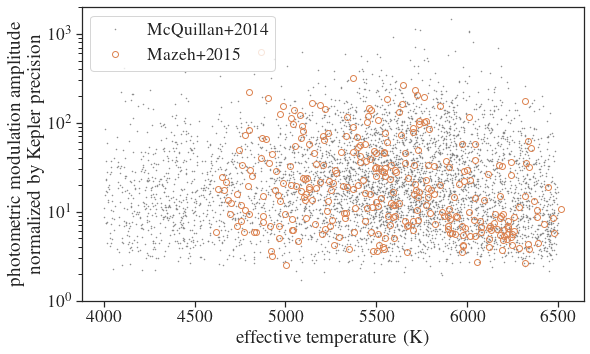

In [8]:
plt.figure(figsize=(10*0.9,6*0.9))
plt.xlabel("effective temperature (K)")
plt.ylabel("photometric modulation amplitude\n normalized by Kepler precision")
#plt.ylim()
plt.yscale('log')
plt.ylim(1, 2e3)
#plt.plot(dm14[dm14.Rper==dm14.Rper].Teff, dm14[dm14.Rper==dm14.Rper].Rnorm, ',', color='gray')
plt.plot(dm22.teff, dm22.Rnorm, '.', markersize=1, color='gray', label='McQuillan+2014')
plt.plot(dm15c.teff, dm15c.Rnorm, 'o', mfc='none', color='C1', mew=1, label='Mazeh+2015')
plt.legend(loc='upper left')
plt.savefig("rnorm_teff.png", dpi=200, bbox_inches='tight')
#plt.plot(dm15[dm15.acf==True].Teff, dm15[dm15.acf==True].Rnorm, '.')

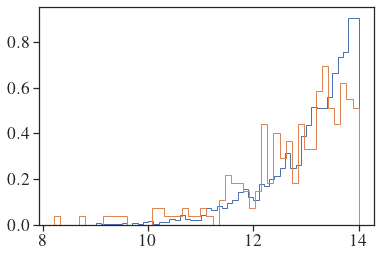

In [9]:
magcut = 14.
plt.hist(dm22.kepmag[dm22.kepmag<magcut], density=True, histtype='step', bins=50)
plt.hist(dm15c.kepmag[dm15c.kepmag<magcut], density=True, histtype='step', bins=50);

In [10]:
y1 = np.array(dm22.Rnorm) 
y2 = np.array(dm15c.Rnorm)

In [11]:
from scipy.stats import ks_2samp
ks_2samp(y1, y2)

KstestResult(statistic=0.1317103557475363, pvalue=1.586353925198125e-05)

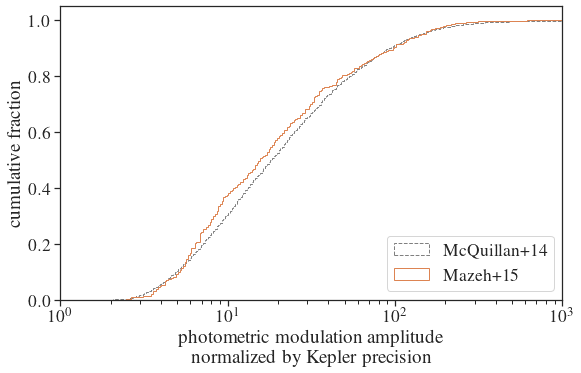

In [12]:
cum = True
bins = np.logspace(-1, 4, 500) 
plt.figure(figsize=(10*0.9,6*0.9))
plt.xlim(1., 1e3)
plt.xscale("log")
plt.ylabel("cumulative fraction")
plt.xlabel("photometric modulation amplitude\n normalized by Kepler precision")
#plt.yscale("log")
#plt.ylim(5e-5, 0.5)
plt.hist(y1, density=True, histtype='step', lw=1, bins=bins, cumulative=cum, ls='dashed',
         label='McQuillan+14', color='gray')
plt.hist(y2, density=True, histtype='step', lw=1, bins=bins, cumulative=cum, label='Mazeh+15', color='C1')
#plt.hist(dm15c.Rnorm, density=True, histtype='step', lw=1, bins=bins, cumulative=cum);
plt.legend(loc='lower right')
plt.savefig("rnorm_hist.png", dpi=200, bbox_inches="tight")

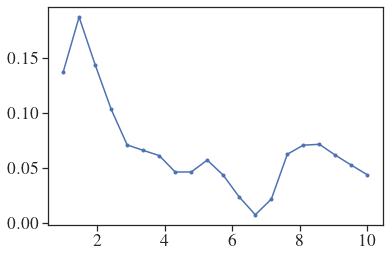

In [13]:
pcts = np.linspace(1, 10, 20)
pcts14 = np.percentile(dm22.Rnorm, pcts)
pcts15 = np.nanpercentile(dm15c.Rnorm, pcts)
#plt.plot(pcts, pcts14, '.-')
#plt.plot(pcts, np.nanpercentile(dm15.Rnorm, pcts), '.-')
plt.plot(pcts, pcts15/pcts14-1., '.-');